In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

In [2]:
df = pd.read_csv('data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [3]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [4]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [5]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [6]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [10]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [11]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [12]:
df = pd.DataFrame(df)
df.drop("id", axis=1, inplace=True)
df.drop("Unnamed: 32", axis=1, inplace=True)  # drop redundant columns

df["diagnosis"] = (df["diagnosis"] == "M").astype(int)  # encode the label into 1/0
print(df)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

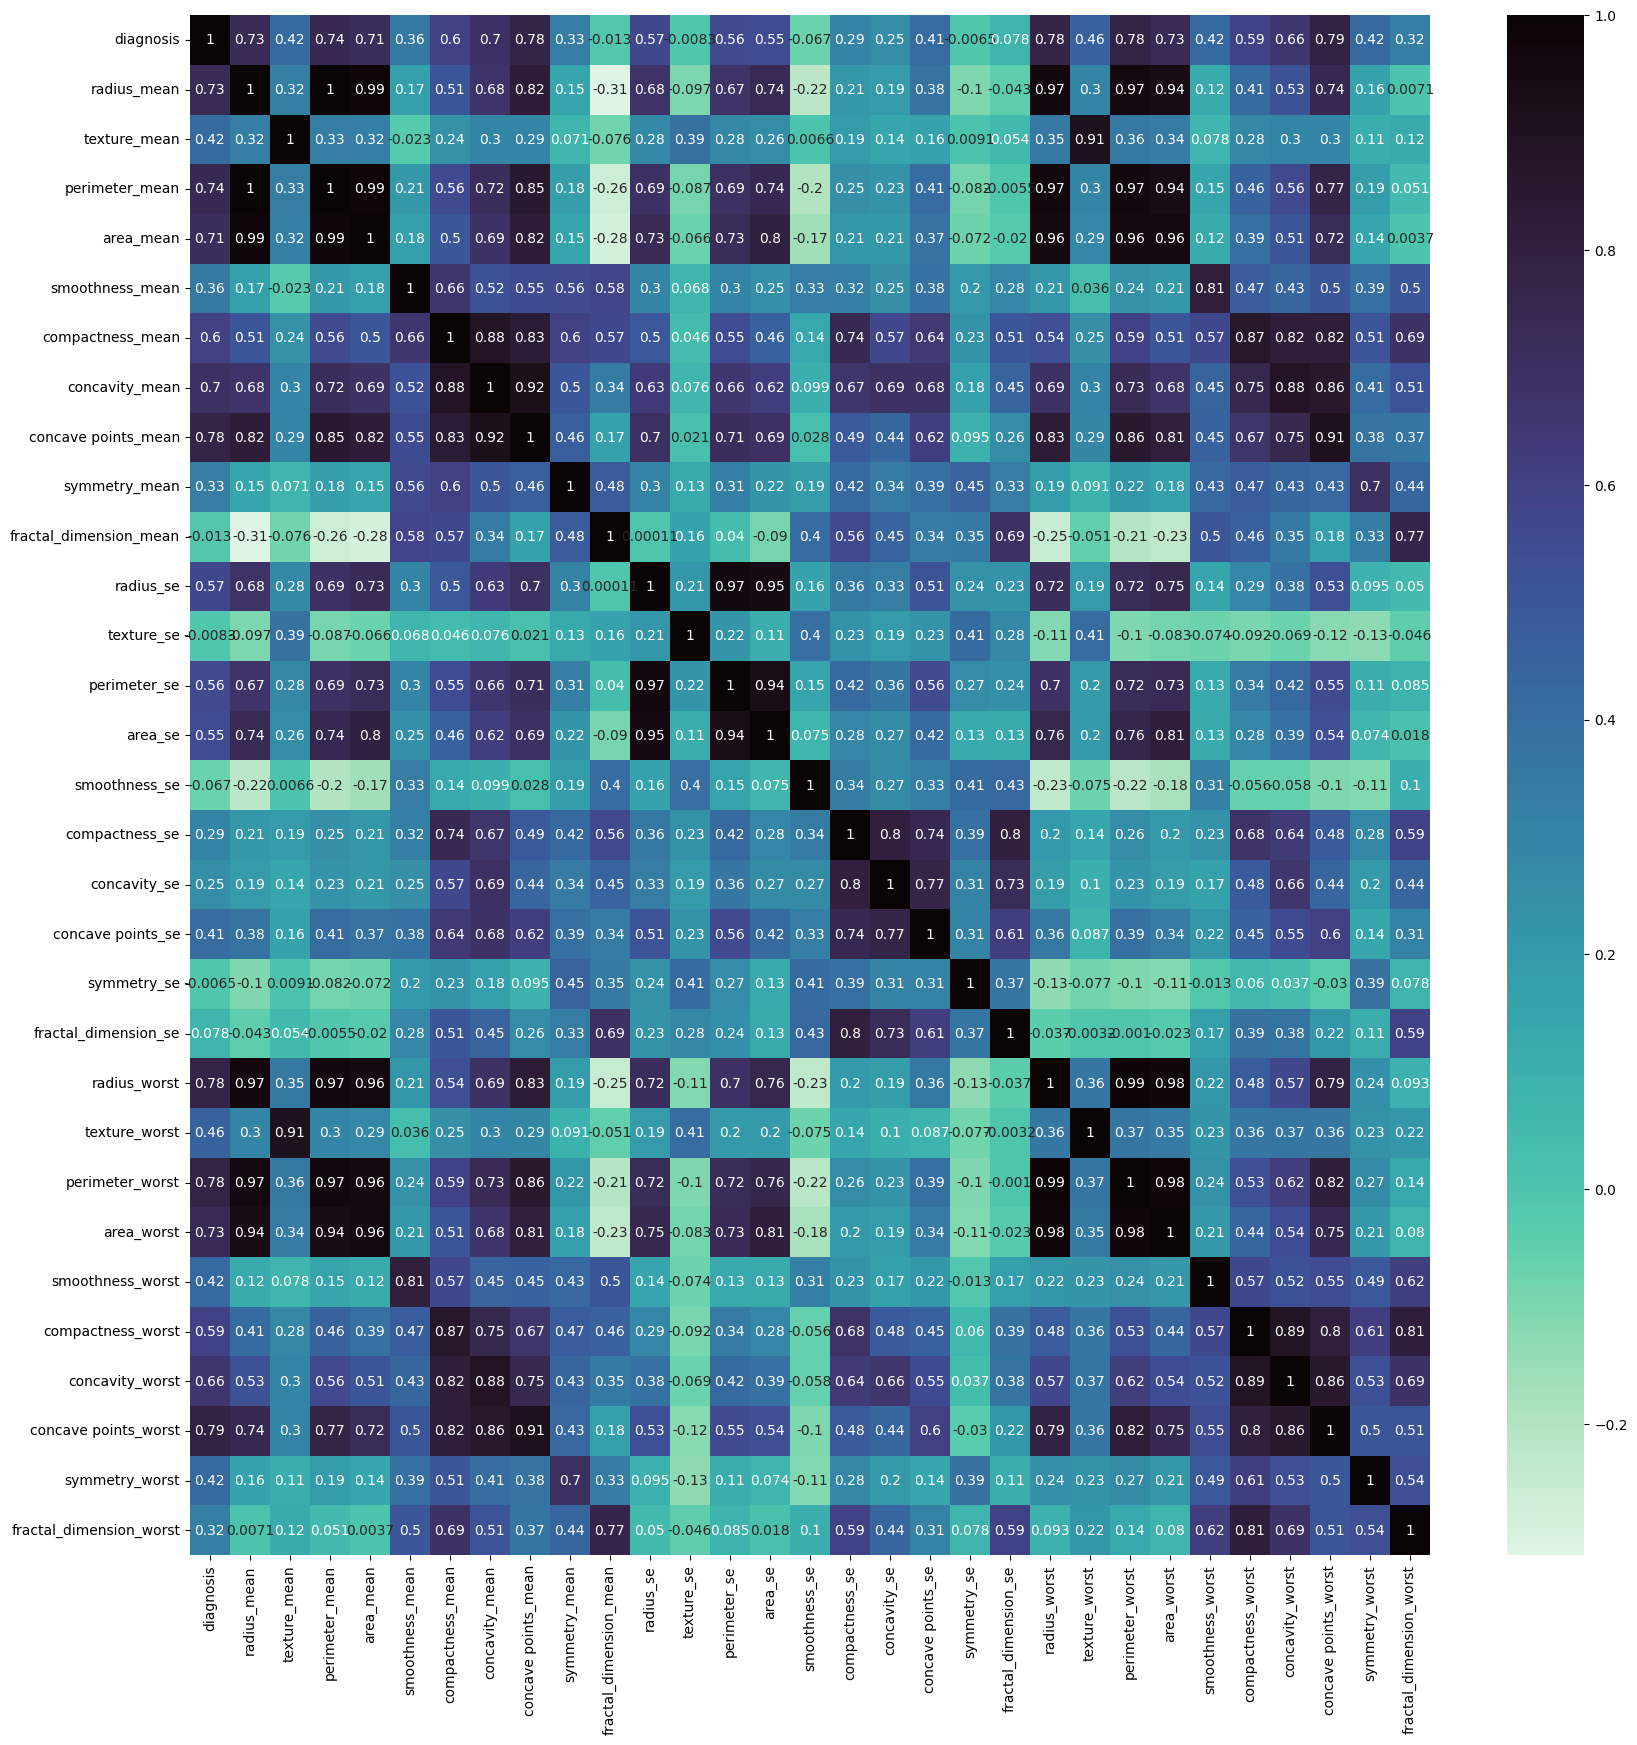

In [13]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [14]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.7)
relevant_features = cor_target[cor_target > 0.7]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove("diagnosis")

# Display the results
pprint.pprint(names)

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']


In [15]:
X = df[names].values
y = df['diagnosis'].values
X.shape[0]


569

In [16]:
columns_of_interest = [
    "radius_mean",
    "perimeter_mean",
    "area_mean",
    "concave points_mean",
    "radius_worst",
    "perimeter_worst",
    "area_worst",
    "concave points_worst",
]

min_max_values = df[columns_of_interest].agg(["min", "max"]).transpose()
pprint.pprint(min_max_values)

                          min        max
radius_mean             6.981    28.1100
perimeter_mean         43.790   188.5000
area_mean             143.500  2501.0000
concave points_mean     0.000     0.2012
radius_worst            7.930    36.0400
perimeter_worst        50.410   251.2000
area_worst            185.200  4254.0000
concave points_worst    0.000     0.2910


In [17]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    n_samples = X.shape[0]

    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train[0]

array([2.073e+01, 1.357e+02, 1.419e+03, 8.646e-02, 3.249e+01, 2.140e+02,
       3.432e+03, 1.659e-01])

In [19]:
with open ("Xtrain.pkl","wb") as file:
    pickle.dump(X_train,file)

In [20]:
y_train[0]

1

In [21]:
def standardize_data(X_train, X_test):
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)
    

In [22]:
def sigmoid(z):
    # Compute the sigmoid function using the formula: 1 / (1 + e^(-z)).
    sigmoid_result = 1 / (1 + np.exp(-z))
    
    # Return the computed sigmoid value.
    return sigmoid_result

In [23]:
z = np.linspace(-12, 12, 200)

fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9"), 
    yaxis=dict(color="#41BEE9") 
)
fig.show()

In [24]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0

    def forward(self, X):
        Z = np.matmul(X, self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        m = self.X.shape[0]  # number of training examples
        # compute the cost
        cost = np.sum((-np.log(predictions + 1e-8) * self.y)+ (-np.log(1 - predictions + 1e-8)) * (1 - self.y))  # adding small value epsilon to avoid log of 0
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        # get training shape
        m = self.X.shape[0]

        # compute gradients
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        self.db = np.sum(np.subtract(predictions, self.y))

        # scale gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1

    def fit(self, X, y, iterations, plot_cost=True):
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # forward propagation
            predictions = self.forward(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute gradients
            self.compute_gradient(predictions)

            # update parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(y=costs, title="Cost vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="cost"),
            )
            fig.show()

    def predict(self, X):
        predictions = self.forward(X)
        print(predictions)
        return np.round(predictions)

    def predict_proba_lr(self, X):
        decision_values = np.dot(X, self.W) + self.b
        probabilities = sigmoid(decision_values)
        return probabilities

    def save_model(self, filename=None):
        model_data = {"learning_rate": self.learning_rate, "W": self.W, "b": self.b}

        with open(filename, "wb") as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        with open(filename, "rb") as file:
            model_data = pickle.load(file)

        # Create a new instance of the class and initialize it with the loaded parameters
        loaded_model = cls(model_data["learning_rate"])
        loaded_model.W = model_data["W"]
        loaded_model.b = model_data["b"]

        return loaded_model

In [25]:
lg = LogisticRegression()
lg.fit(X_train, y_train,100000)

Cost after iteration 0: 0.6931471605599454


Cost after iteration 10000: 0.31972796779303875
Cost after iteration 20000: 0.25726648996502827
Cost after iteration 30000: 0.2295878180194347
Cost after iteration 40000: 0.21345149616183354
Cost after iteration 50000: 0.20268994991266598
Cost after iteration 60000: 0.19491347872675596
Cost after iteration 70000: 0.18898591346814356
Cost after iteration 80000: 0.18429203213030465
Cost after iteration 90000: 0.18046713722453975


In [26]:
y.shape

(569,)

In [27]:
lg.save_model("LRmodel.pkl")


In [28]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)


    @staticmethod
    def f1_score(y_true, y_pred):
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

    

In [29]:
model = LogisticRegression.load_model("LRmodel.pkl")
print(type(model))

<class '__main__.LogisticRegression'>


In [30]:

y_pred = model.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

[1.27457440e-01 9.92468438e-01 8.41124517e-01 5.09678334e-02
 2.75521894e-02 9.99723445e-01 9.99882394e-01 9.24118508e-01
 4.38335960e-01 8.77502842e-02 5.97197826e-02 8.80476960e-01
 1.38261269e-01 6.96614253e-01 7.58334478e-02 9.92950998e-01
 1.75041468e-01 5.25824413e-03 7.09157396e-04 9.98717683e-01
 4.14442679e-01 4.79336062e-02 9.99764761e-01 5.24251438e-03
 1.85205541e-02 1.53665369e-01 1.07947793e-01 1.81566903e-02
 5.72197146e-02 9.81164711e-01 2.05662181e-02 3.58092486e-02
 8.53034252e-03 1.33215421e-01 1.06974340e-02 2.74965135e-02
 5.62796072e-01 4.48906591e-02 9.84025454e-01 1.77306212e-01
 8.44898928e-03 7.41305191e-01 7.09758352e-02 3.14120657e-02
 9.00996805e-02 3.32380057e-02 9.75149209e-03 2.52047481e-03
 4.16197309e-02 1.07787544e-01 9.61096408e-01 9.94968520e-01
 2.03308812e-01 2.51667607e-01 3.82686897e-02 1.30886336e-01
 2.72253539e-02 9.99994476e-01 6.26233469e-01 3.27382357e-02
 7.15251745e-02 9.98236169e-01 9.99495993e-01 1.02071733e-01
 2.23228621e-02 9.862039

In [31]:
lg.load_model("LRmodel.pkl")

In [32]:

count_of_ones = 0

for test in X_test:
    if lg.predict([test]) == 1:
        print(f"Features: {test} gggg")
        print(f"Output: {lg.predict([test])}")
        count_of_ones += 1

print(f"Total number of outputs equal to 1: {count_of_ones}")

[0.12745744]
[0.99246844]
Features: [1.35754552 1.29836264 1.33143707 0.81924077 1.76713613 1.73906275
 1.69875996 0.99044597] gggg
[0.99246844]
Output: [1.]
[0.84112452]
Features: [0.37493487 0.39916456 0.26082759 0.85501272 0.61500267 0.52153231
 0.47229314 0.56884496] gggg
[0.84112452]
Output: [1.]
[0.05096783]
[0.02755219]
[0.99972344]
Features: [1.82626209 1.97584064 1.71068734 2.7259382  1.94818567 2.29437541
 1.62102615 2.3104404 ] gggg
[0.99972344]
Output: [1.]
[0.99988239]
Features: [2.22438882 2.26736148 2.32029704 2.67596268 2.34320286 2.6032124
 2.32235788 1.97622578] gggg
[0.99988239]
Output: [1.]
[0.92411851]
Features: [0.97071316 0.94525289 0.84009727 0.81976683 0.76930626 0.81849096
 0.59493982 0.47992547] gggg
[0.92411851]
Output: [1.]
[0.43833596]
[0.08775028]
[0.05971978]
[0.88047696]
Features: [0.74764925 0.71121504 0.64682009 0.45757585 0.77753578 0.69376833
 0.65194462 0.50752118] gggg
[0.88047696]
Output: [1.]
[0.13826127]
[0.69661425]
Features: [ 0.60082237  0.6

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.97      0.93      0.95        42

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

skmodel = LogisticRegression()
skmodel.fit(X_train, y_train)
sk_predictions = skmodel.predict(X_test)

accuracy_value = accuracy_score(y_test, sk_predictions)
print(f"Accuracy: {accuracy_value}")

Accuracy: 0.9734513274336283


Confusion Matrix:
[[70  1]
 [ 3 39]]


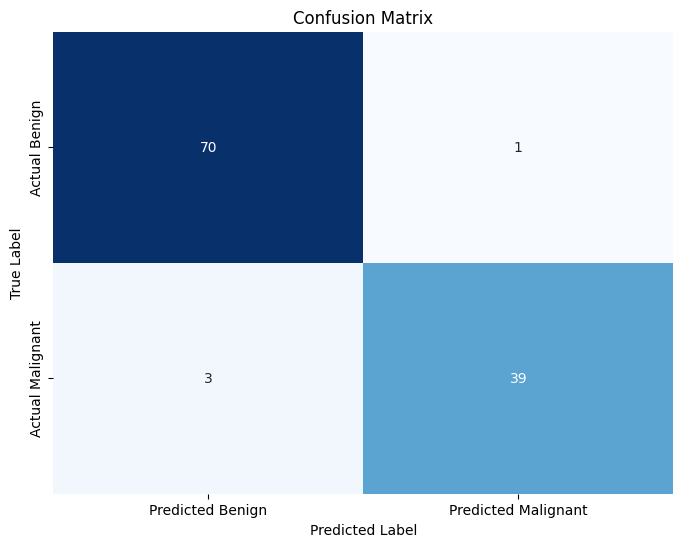

In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted Benign", "Predicted Malignant"],
    yticklabels=["Actual Benign", "Actual Malignant"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

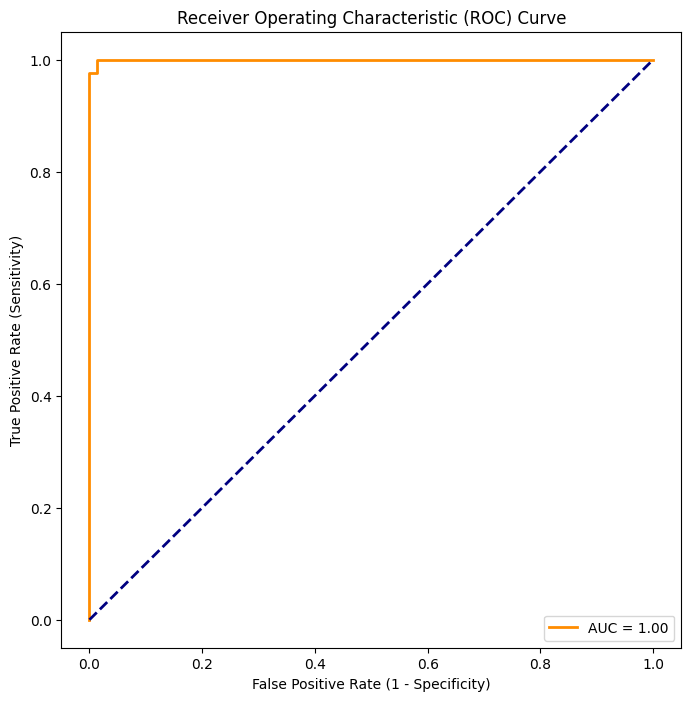

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Get predicted probabilities
y_probabilities = logreg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [37]:
import numpy as np
from scipy.optimize import minimize

# Given coefficients 'a' and intercept 'b'
coefficients_a = np.array(
    [
        0.36742763,
        0.39349866,
        0.35005017,
        0.68416233,
        0.51727446,
        0.53070336,
        0.45767233,
        0.82037856,
    ]
)
intercept_b = -0.5822112769378097


# Define the negative log-likelihood function for minimization
def negative_log_likelihood(x):
    log_odds = np.dot(coefficients_a, x) + intercept_b
    predicted_probability = 1 / (1 + np.exp(-log_odds))
    return -np.log(predicted_probability)


# Initial guess for input feature vector 'x'
initial_guess_x = np.zeros(len(coefficients_a))

# Perform minimization to find 'x' that maximizes predicted probability
result = minimize(negative_log_likelihood, initial_guess_x, method="BFGS")

# Extract the optimized input feature vector
optimized_x = result.x

print(f"Optimized Input Feature Vector: {optimized_x}")

Optimized Input Feature Vector: [1.99216181 2.13351646 1.89794295 3.70947055 2.80461871 2.87742874
 2.48146075 4.44802303]
